## Библиотека Pandas для обработки данных

In [1]:
# импортируем библиотеку Pandas
# http://pandas.pydata.org/pandas-docs/stable/tutorials.html
import pandas as pd
import numpy as np

# для рисования диаграм
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# берем данные из файла query-sample.txt
# если файл влезает в оперативную память, то все работает быстро
# формируем DataFrame и смотрим что получилось
data = pd.read_csv('sample.txt', sep='\t', names=['date', 'query', 'project', 'shows'])
data.head()

,date,query,project,shows
0,01.09.2015,сбербанк онлайн,Finance,114362
1,01.09.2015,знакомства на рамблере,Horoscopes,114248
2,01.09.2015,сбербанк,Finance,114133
3,01.09.2015,день знаний,Horoscopes,114019
4,01.09.2015,од,Video,113905


In [3]:
# основные характеристики
data.describe()

,shows
count,99998.000000
mean,1199.222104
std,7999.629338
min,25.000000
25%,33.000000
50%,47.000000
75%,85.000000
max,114362.000000


In [4]:
# пример построения сводной таблицы
# http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.pivot_table.html

pd.pivot_table(data, index=['project'], values=['shows'], aggfunc=np.sum)

,shows
project,
Afisha,3784365
Auto,5294272
Championat,3804336
Eda,1091901
Finance,10635168
Gazeta,2637420
HP,16131711
Horoscopes,2421596
Lenta,4727602


### Работа с DataFrame

In [5]:
# возьмем только проект Финансы
dataFinance = data.loc[data['project']=='Finance']
dataFinance.head()

,date,query,project,shows
0,01.09.2015,сбербанк онлайн,Finance,114362
2,01.09.2015,сбербанк,Finance,114133
35,01.09.2015,мтс,Finance,110427
44,01.09.2015,однок,Finance,109437
69,01.09.2015,почта,Finance,106733


In [6]:
# посмотрим сколько получилось строк
# количество строк len(...) имеет тип число, поэтому преобразуем в строку для использования в составе строки (функция str)
print 'Поисковых фраз по проекту Финансы - ' + str(len(dataFinance))

Поисковых фраз по проекту Финансы - 6625


In [7]:
# посмотрим фразы, которые содержат 'курс'
# берем ту же переменную dataFinance
# http://pandas.pydata.org/pandas-docs/stable/text.html

dataFinance = dataFinance.loc[dataFinance['query'].str.contains('курс')]
dataFinance.head()

,date,query,project,shows
108,01.09.2015,курс доллара,Finance,102649
580,01.09.2015,курс доллара онлайн,Finance,64013
1287,01.09.2015,курсы валют в банках москвы,Finance,31555
5093,01.09.2015,курс валют онлайн,Finance,335
5262,01.09.2015,курс нефти,Finance,326


In [8]:
# посчитаем количество слов в столбце 'query'
# для сложных метрик можно завести новый dataframe и добавлять в него построчно нужные значения

dataFinanceNew = pd.DataFrame(columns=['date', 'query', 'project', 'shows', 'count'])

for line in dataFinance.values:
    dataFinanceNew = dataFinanceNew.append(pd.DataFrame([[line[0], line[1], line[2], line[3], len(line[1].split(' '))]], \
                                                        columns=['date', 'query', 'project', 'shows', 'count']))
    
dataFinanceNew.head()

,date,query,project,shows,count
0,01.09.2015,курс доллара,Finance,102649.0,2.0
0,01.09.2015,курс доллара онлайн,Finance,64013.0,3.0
0,01.09.2015,курсы валют в банках москвы,Finance,31555.0,5.0
0,01.09.2015,курс валют онлайн,Finance,335.0,3.0
0,01.09.2015,курс нефти,Finance,326.0,2.0


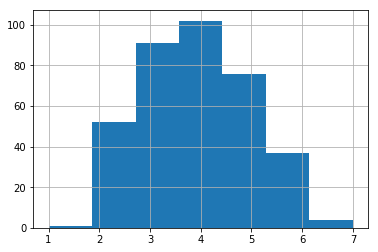

In [9]:
# нарисуем распределение столбца 'count' (т. е. какое количество раз встретилась каждая цифра)
# параметр bins определяет количество столбцов на графике

dataFinanceNew['count'].hist(bins=7)